<a target="_blank" href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL-Tutorials/blob/master/2-Advance/FinRL_Ensemble_StockTrading_ICAIF_2020.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
from examples.FinRL_StockTrading_Sanity import run_ensemble_with_params
# ## install finrl library
!pip install wrds
!pip install swig
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
zsh:1: command not found: apt-get
Obtaining file:///Users/ruxu/Desktop/AA228/Project_3/FinRL
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /private/var/folders/4g/ysbz5xb13q91647czp8lcqg4001mtg/T/pip-install-ho0paufy/elegantrl_93fa8608d5ff4295848ae99d67ca0d49
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /private/var/folders/4g/ysbz5xb13q91647czp8lcqg4001mtg/T/pip-install-ho0paufy/elegantrl_93fa8608d5ff4295848ae99d67ca0d49
  Resolved https://github.com/AI4Finance-Foundation/Elega

In [20]:
!pip install -e ~/Workspace/AI4Finance/FinRL

Obtaining file:///Users/tonyren/Workspace/AI4Finance/FinRL
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /private/var/folders/fk/ghrbpzjd2ljb898y6fvw8sgc0000gn/T/pip-install-_cs85q_3/elegantrl_c46be8593cbb4f32969c8afce9b94eb5
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /private/var/folders/fk/ghrbpzjd2ljb898y6fvw8sgc0000gn/T/pip-install-_cs85q_3/elegantrl_c46be8593cbb4f32969c8afce9b94eb5
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit c2939fefe0e3ec55601ded49e39fdf9d7d781ea0
  Preparing metadata (setup.py) ... done
  Building editable for finrl (pyproject.toml) ... done
  Created wheel for finrl: filename=finrl-0.3.6-py3-none-any.whl size=9103 sha256=ebb9a360ce7d0d9eb

<a id='1.3'></a>
## 2.3. Import Packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import CUSTOM_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent,DRLStackingAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from finrl.agents.stablebaselines3.models import hyperparameterized_model_name, MODELS


from pprint import pprint

import sys
import itertools

<a id='1.4'></a>
## 2.4. Create Folders

In [3]:
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [5]:
# test dummy stock
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.config_tickers import CUSTOM_TICKER
from finrl.meta.preprocessor.preprocessors import FeatureEngineer

# ORIGINAL
TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2021-10-01'
TEST_START_DATE = '2021-10-01'
TEST_END_DATE = '2023-03-01'




INDICATORS = ['close_-1_s','close_-2_s','close_-3_s','close_-4_s','close_-5_s', 'close_0_s']
CUSTOM_TICKER = [
    "INTC",
    "F",
    "PARA",
    "LVS"
]
def dummy_stock(n, type='flat'):
    if type == 'flat':
        return [10]*n
    if type == 'triangle':
       return ((list(np.arange(100,2000,100)) + list(np.arange(2000,100,-100)))*n)[0:n]
    if type == 'up':
       return list(np.arange(10,20000,(20000-10)/n))[0:n]
    if type == 'down':
       return list(np.arange(20000,10,(10-20000)/n))[0:n]

if True:
    df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TEST_END_DATE,
                     ticker_list = CUSTOM_TICKER).fetch_data()

    #df['close'] = dummy_stock(df.shape[0], type='triangle')
    #df['open'] = dummy_stock(df.shape[0], type='triangle')
    #df['low'] = dummy_stock(df.shape[0], type='triangle')
    #df['high'] = dummy_stock(df.shape[0], type='triangle')
    fe = FeatureEngineer(use_technical_indicator=True,
                         tech_indicator_list = INDICATORS,
                         use_turbulence=True,
                         user_defined_feature = False)

    processed = fe.preprocess_data(df)
    processed = processed.copy()
    processed = processed.fillna(0)
    processed = processed.replace(np.inf,0)
    processed['close_-1_s'] = 100*(processed['close']-processed['close_-1_s'])/processed['close_-1_s']
    processed['close_-2_s'] = 100*(processed['close']-processed['close_-2_s'])/processed['close_-2_s']
    processed['close_-3_s'] = 100*(processed['close']-processed['close_-3_s'])/processed['close_-3_s']
    processed['close_-4_s'] = 100*(processed['close']-processed['close_-4_s'])/processed['close_-4_s']
    processed['close_-5_s'] = 100*(processed['close']-processed['close_-5_s'])/processed['close_-5_s']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (13244, 8)
Successfully added technical indicators
Successfully added turbulence index


In [6]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 4, State Space: 33


In [7]:
import random
import copy
def generate_hyperparams_list_from_code(num_variations=5, duplication=4):
    hyperparams_list = []

    # PPO Variations
    PPO_variations = {
        'learning_rate': [1e-5, 1e-4, 1e-3],
        'n_steps': [256, 512, 1024, 2048],
        'batch_size': [64, 128],
        'gamma': [0.98, 0.99],
        'ent_coef': [1e-5, 1e-3],
        'clip_range': [0.2, 0.3],
        'gae_lambda': [0.95, 0.98]
    }

    # A2C Variations
    A2C_variations = {
        'learning_rate': [1e-5, 1e-4, 1e-3, 0.0007],
        'n_steps': [5, 10, 20],
        'gamma': [0.98, 0.99],
        'ent_coef': [1e-5, 1e-3, 0.005],
        'normalize_advantage': [True, False],
        'use_rms_prop': [True, False]
    }

    # DDPG Variations
    DDPG_variations = {
        'learning_rate': [1e-4, 1e-3],
        'batch_size': [64, 128],
        'buffer_size': [int(1e5), int(1e6)],
        'tau': [0.005, 0.01],
        'gamma': [0.98, 0.99],
        'train_freq': [1, 10],
        'action_noise': ['normal', 'ornstein_uhlenbeck']
    }

    # SAC Variations
    SAC_variations = {
        'learning_rate': [1e-4, 1e-3],
        'batch_size': [64, 128],
        'buffer_size': [int(1e5), int(1e6)],
        'tau': [0.005, 0.01],
        'gamma': [0.98, 0.99],
        'train_freq': [1, 10],
        'ent_coef': ['auto'],
    }

    # TD3 Variations
    TD3_variations = {
        'learning_rate': [1e-4, 1e-3],
        'batch_size': [64, 128],
        'buffer_size': [int(1e5), int(1e6)],
        'tau': [0.005, 0.01],
        'gamma': [0.98, 0.99],
        'train_freq': [1, 10],
        'action_noise': ['normal', 'ornstein_uhlenbeck']
    }

    # Timesteps Variations
    timesteps_variations = {
        'a2c': [30000],
        'ppo': [30000],
        'ddpg': [30000],
        'sac': [30000],
        'td3': [30000]
    }

    hyperparams_list = []
    for i in range(num_variations):
        A2C_kwargs = {k: random.choice(v) for k, v in A2C_variations.items()}
        PPO_kwargs = {k: random.choice(v) for k, v in PPO_variations.items()}
        DDPG_kwargs = {k: random.choice(v) for k, v in DDPG_variations.items()}
        SAC_kwargs = {k: random.choice(v) for k, v in SAC_variations.items()}
        TD3_kwargs = {k: random.choice(v) for k, v in TD3_variations.items()}
        timesteps_dict = {k: random.choice(v) for k, v in timesteps_variations.items()}


        if True:
            A2C_kwargs = {'learning_rate': 0.0007, 'n_steps': 10, 'gamma': 0.98, 'ent_coef': 0.005, 'normalize_advantage': False, 'use_rms_prop': False, 'name': 'variant_8'}
            DDPG_kwargs = {'learning_rate': 0.0001, 'batch_size': 128, 'buffer_size': 1000000, 'tau': 0.005, 'gamma': 0.99, 'train_freq': 10, 'action_noise': 'normal', 'name': 'variant_10'}
            TD3_kwargs = {'learning_rate': 0.001, 'batch_size': 128, 'buffer_size': 1000000, 'tau': 0.005, 'gamma': 0.98, 'train_freq': 10, 'action_noise': 'normal', 'name': 'variant_7'}
            SAC_kwargs = {'learning_rate': 0.001, 'batch_size': 128, 'buffer_size': 100000, 'tau': 0.01, 'gamma': 0.98, 'train_freq': 1, 'ent_coef': 'auto', 'name': 'variant_7'}
            PPO_kwargs = {'learning_rate': 0.001, 'n_steps': 1024, 'batch_size': 64, 'gamma': 0.99, 'ent_coef': 0.001, 'clip_range': 0.3, 'gae_lambda': 0.98, 'name': 'variant_1'}


        # Assign a unique name to each set
        for j in range(duplication):
            name = f"variant:{j+1}"
            print(name)

            A2C_kwargs['name'] = name
            PPO_kwargs['name'] = name
            DDPG_kwargs['name'] = name
            SAC_kwargs['name'] = name
            TD3_kwargs['name'] = name

            hyperparam = {
                'A2C_model_kwargs': A2C_kwargs,
                'PPO_model_kwargs': PPO_kwargs,
                'DDPG_model_kwargs': DDPG_kwargs,
                'SAC_model_kwargs': SAC_kwargs,
                'TD3_model_kwargs': TD3_kwargs,
                'timesteps_dict': timesteps_dict
            }

            hyperparams_list.append(copy.deepcopy(hyperparam))

    return hyperparams_list

In [8]:
hyperparams_list = generate_hyperparams_list_from_code(num_variations=1, duplication=10)

variant:1
variant:2
variant:3
variant:4
variant:5
variant:6
variant:7
variant:8
variant:9
variant:10


In [8]:
import ray
import random
import numpy as np
import torch

ray.init(ignore_reinit_error=True)

@ray.remote
def run_ensemble_with_params(hyperparams, seed, processed):

    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    rebalance_window = 63
    validation_window = 63

    A2C_model_kwargs = hyperparams['A2C_model_kwargs']
    PPO_model_kwargs = hyperparams['PPO_model_kwargs']
    DDPG_model_kwargs = hyperparams['DDPG_model_kwargs']
    SAC_model_kwargs = hyperparams['SAC_model_kwargs']
    TD3_model_kwargs = hyperparams['TD3_model_kwargs']
    timesteps_dict = hyperparams['timesteps_dict']

    env_kwargs = {
        "hmax": 1000,
        "initial_amount": 1000000,
        "buy_cost_pct": 0.001,
        "sell_cost_pct": 0.001,
        "state_space": state_space,
        "stock_dim": stock_dimension,
        "tech_indicator_list": INDICATORS,
        "action_space": stock_dimension,
        "reward_scaling": 1,
        "print_verbosity":100,
    }

    # Instantiate and run the ensemble agent
    ensemble_agent = DRLEnsembleAgent(
        df=processed,
        train_period=(TRAIN_START_DATE, TRAIN_END_DATE),
        val_test_period=(TEST_START_DATE, TEST_END_DATE),
        rebalance_window=rebalance_window,
        validation_window=validation_window,
        **env_kwargs
    )

    df_summary = ensemble_agent.run_ensemble_strategy(
        A2C_model_kwargs,
        PPO_model_kwargs,
        DDPG_model_kwargs,
        SAC_model_kwargs,
        TD3_model_kwargs,
        timesteps_dict
    )

    return df_summary

2024-12-04 08:34:21,589	INFO worker.py:1807 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


In [9]:
ray.shutdown()

NameError: name 'ray' is not defined

In [14]:
futures = []
for seed, hyperparams in enumerate(hyperparams_list):
    future = run_ensemble_with_params.remote(
        hyperparams,
        seed,
        processed
    )
    futures.append(future)

results = ray.get(futures)
for df_summary in results:
    print(df_summary)

  Iter   Val Start     Val End Model Used A2C Sharpe PPO Sharpe DDPG Sharpe  \
0  126  2021-10-04  2022-01-03       DDPG   0.090916  -0.153773    0.136753   
1  189  2022-01-03  2022-04-04        A2C   0.136502  -0.050194   -0.002769   
2  252  2022-04-04  2022-07-06       DDPG  -0.128644  -0.534971   -0.074846   
3  315  2022-07-06  2022-10-04       DDPG  -0.497591  -0.573324   -0.111093   

  SAC Sharpe TD3 Sharpe  
0  -0.122381    0.09658  
1   -0.10292   0.004199  
2  -0.495482  -0.371927  
3  -0.323966  -0.650217  
  Iter   Val Start     Val End Model Used A2C Sharpe PPO Sharpe DDPG Sharpe  \
0  126  2021-10-04  2022-01-03        A2C   0.077756   0.004447   -0.228664   
1  189  2022-01-03  2022-04-04        TD3   0.105748   0.092782   -0.080025   
2  252  2022-04-04  2022-07-06        TD3  -0.328514  -0.430569   -0.243422   
3  315  2022-07-06  2022-10-04        TD3  -0.554785  -0.606414   -0.204878   

  SAC Sharpe TD3 Sharpe  
0    -0.1058   -0.08995  
1  -0.067143   0.120649  


# individual model performance in Validation

In [10]:
import hashlib
from collections import defaultdict
run_reports = []
preconfig_models = defaultdict(lambda: [])
for time_window in [126, 189, 252, 315]:
    for hyperparam in hyperparams_list:
        for k, v in hyperparam.items():
            if 'model_kwargs' in k:
                model_type = k.split('_')[0].lower()
                trial = int(v['name'].split(':')[1])
                hash_id = hyperparameterized_model_name(model_type, v)
                if time_window == 126:
                    preconfig_models[trial].append({'model_path': f'trained_model/{hash_id}_30k_126',
                                                    'model_type': model_type})
                r = (list(pd.read_csv(f'results/account_value_validation_{hash_id}_{time_window}.csv')['account_value'])[-1]/1000000) - 1
                run_reports.append(['validation', model_type, trial, time_window, r,  hash_id, v])

validation_performance_stats = pd.DataFrame(run_reports, columns=['mode', 'model_type', 'trial', 'time_window', 'return','hash_id', 'config'])

validation_performance_stats['config_str'] = [hashlib.md5(str({z for z in x.items() if z[0] != 'name'}).encode()).hexdigest()  for x in validation_performance_stats['config']]
validation_performance_stats.sort_values(['model_type','time_window', 'trial'], ascending=[True, True, True], inplace=True)
#validation_performance_stats.to_csv('individual_agent_validation_performance.csv')

In [11]:
validation_performance_stats = pd.read_csv("individual_agent_validation_performance.csv")

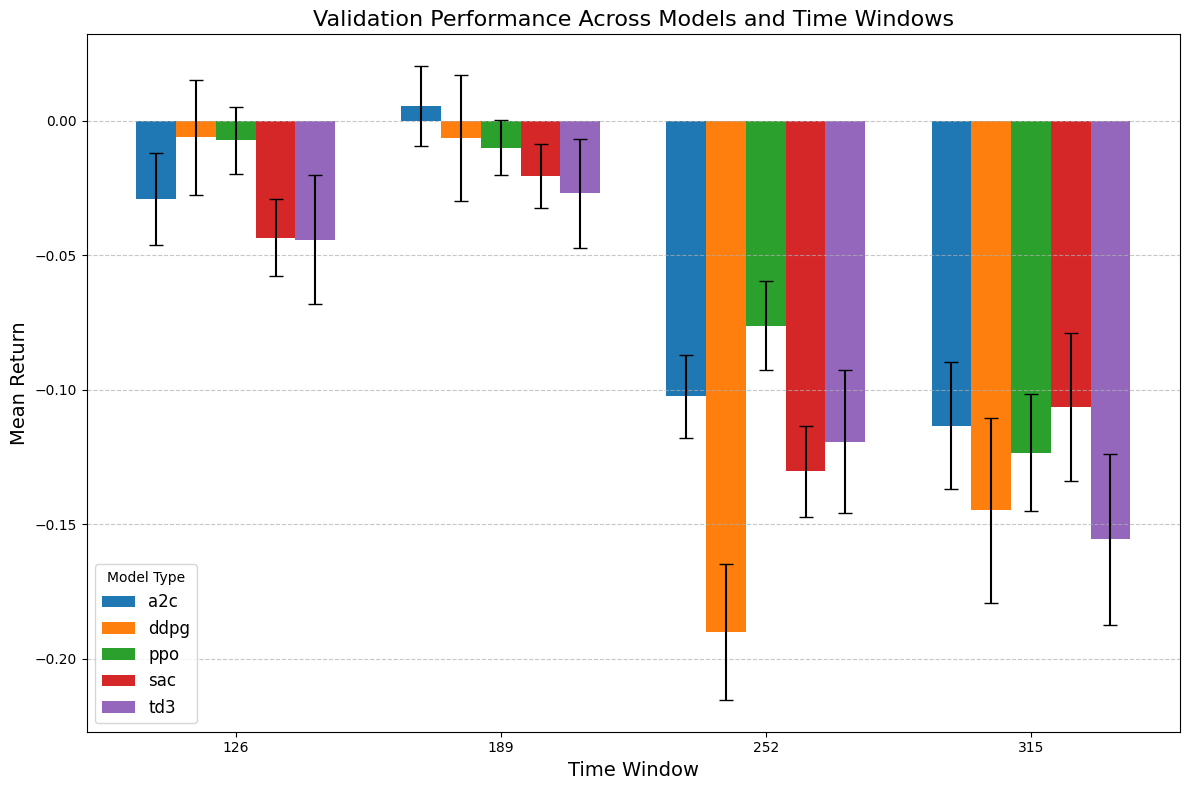

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Assuming the DataFrame has the following columns: 'model_type', 'trial', 'time_window', 'return'

# Group by 'model_type' and 'time_window' to compute the mean and SEM
grouped = validation_performance_stats.groupby(['model_type', 'time_window']).agg(
    mean_return=('return', 'mean'),
    sem_return=('return', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()

# Pivot the data to make it easier to plot with bar chart
pivot_table = grouped.pivot(index='time_window', columns='model_type', values='mean_return')
error_table = grouped.pivot(index='time_window', columns='model_type', values='sem_return')

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width and positions
bar_width = 0.15
time_windows = pivot_table.index
x = np.arange(len(time_windows))

# Plot bars for each model_type
for i, model in enumerate(pivot_table.columns):
    ax.bar(
        x + i * bar_width,
        pivot_table[model],
        bar_width,
        label=model,
        yerr=error_table[model],
        capsize=5,
    )

# Add labels, title, and legend
ax.set_xlabel("Time Window", fontsize=14)
ax.set_ylabel("Mean Return", fontsize=14)
ax.set_title("Validation Performance Across Models and Time Windows", fontsize=16)
ax.set_xticks(x + bar_width * (len(pivot_table.columns) - 1) / 2)
ax.set_xticklabels(time_windows)
ax.legend(title="Model Type", fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# individual model performance in training


In [13]:
import hashlib
from collections import defaultdict
run_reports = []

for hyperparam in hyperparams_list:
    for episode in [1,2,3,4,5,6,7,8,9,10]:
        for k, v in hyperparam.items():
            if 'model_kwargs' in k:
                model_type = k.split('_')[0].lower()
                trial = int(v['name'].split(':')[1])
                variant = v['name']
                hash_id = hyperparameterized_model_name(model_type, v)
                r = (list(pd.read_csv(f'results/account_value_train_{hash_id}_{variant}_{episode}.csv')['account_value'])[-1]/1000000) - 1
                run_reports.append(['training', model_type, trial, episode, r, hash_id, v])

training_performance_stats = pd.DataFrame(run_reports, columns=['mode', 'model_type', 'trial', 'episode', 'return','hash_id', 'config'])

training_performance_stats['config_str'] = [hashlib.md5(str({z for z in x.items() if z[0] != 'name'}).encode()).hexdigest()  for x in training_performance_stats['config']]

training_performance_stats.sort_values(['model_type', 'trial', 'episode'], ascending=[True, True, True], inplace=True)
#training_performance_stats.to_csv('individual_agent_training_performance.csv')

In [14]:
training_performance_stats = pd.read_csv("individual_agent_training_performance.csv")

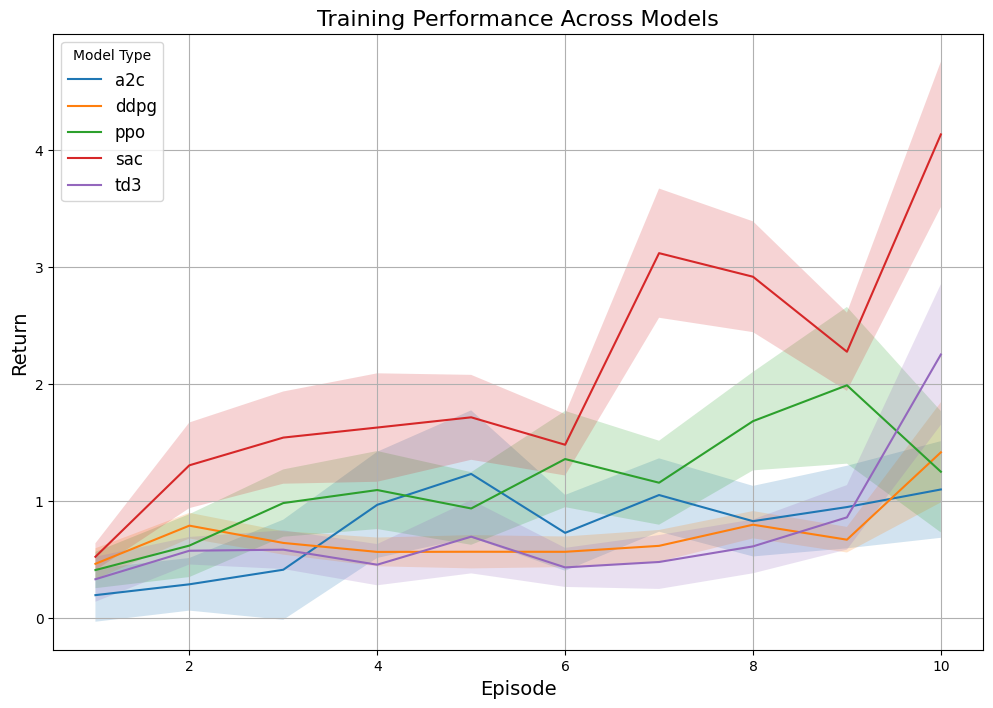

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming the DataFrame has the following columns: 'model_type', 'trial', 'episode', 'return'

# Group by 'model_type' and 'episode' to compute the mean and SEM
grouped = training_performance_stats.groupby(['model_type', 'episode']).agg(
    mean_return=('return', 'mean'),
    sem_return=('return', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()

# Create the plot
plt.figure(figsize=(12, 8))

# Iterate over each model_type and add its plot
model_types = grouped['model_type'].unique()

for model in model_types:
    # Filter data for the current model type
    model_data = grouped[grouped['model_type'] == model]

    # Plot the mean return with SEM confidence intervals
    plt.plot(model_data['episode'], model_data['mean_return'], label=model)
    plt.fill_between(
        model_data['episode'],
        model_data['mean_return'] - model_data['sem_return'],
        model_data['mean_return'] + model_data['sem_return'],
        alpha=0.2
    )

# Add titles, labels, and legend
plt.title("Training Performance Across Models", fontsize=16)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Return", fontsize=14)
plt.legend(title="Model Type", fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

In [15]:
# 1. we trained 50 models using same set of hyperparameters, 10 for each type with name variant:1...variant_10
# 2. we get ensemble performance for 10 of those variants on the testing period (2 years), shown in the ensemble data


In [ ]:
# 3. we will train 10 stacking models and evaluate the performance over same testing period (2 years)


In [19]:
ray.shutdown()


In [16]:
# stacking agent
import ray
import random
import numpy as np
import torch

ray.init(ignore_reinit_error=True)

@ray.remote
def run_stacking_with_params(pretrained_model_zips, model_kwargs, seed, processed):

    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    rebalance_window = 63
    validation_window = 63
    timesteps_dict = {'model_6': 20000}

    state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension + 5 * stock_dimension
    env_kwargs = {
        "hmax": 1000,
        "initial_amount": 1000000,
        "buy_cost_pct": 0.001,
        "sell_cost_pct": 0.001,
        "state_space": state_space,
        "stock_dim": stock_dimension,
        "tech_indicator_list": INDICATORS,
        "action_space": stock_dimension,
        "reward_scaling": 1,
        "print_verbosity":100,
        "pretrained_model_configs": pretrained_model_zips
    }

    # Instantiate and run the stacking agent
    stacking_agent = DRLStackingAgent(
        df=processed,
        train_period=(TRAIN_START_DATE, TRAIN_END_DATE),
        val_test_period=(TEST_START_DATE, TEST_END_DATE),
        rebalance_window=rebalance_window,
        validation_window=validation_window,
        **env_kwargs
    )

    df_summary = stacking_agent.run_stack_strategy(
        model_kwargs, timesteps_dict
    )

    return df_summary

2024-12-04 10:17:14,556	INFO worker.py:1807 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


In [ ]:
futures = []
stacking_params = []


for seed, key in enumerate(preconfig_models.keys()):
    shadow_index = 0.0000001*seed # to make sure the hash_id is not the same when we save


    model_kwargs = {
     'learning_rate': 0.001 + shadow_index,
     'batch_size': 128,
     'buffer_size': 100000,
     'tau': 0.01,
     'gamma': 0.98,
     'train_freq': 1,
     'ent_coef': 'auto',
     'name': f'variant:{int(seed+1)}'
     }


    stacking_params.append(model_kwargs)
    future = run_stacking_with_params.remote(
        preconfig_models[key],
        model_kwargs,
        seed,
        processed
    )
    futures.append(future)

results = ray.get(futures)
for df_summary in results:
    print(df_summary)

In [17]:
ray.shutdown()


(run_stacking_with_params pid=5559) | time/              |            |
(run_stacking_with_params pid=5559) |    episodes        | 9          |
(run_stacking_with_params pid=5559) |    fps             | 2          |
(run_stacking_with_params pid=5559) |    time_elapsed    | 302        |
(run_stacking_with_params pid=5559) |    total_timesteps | 783        |
(run_stacking_with_params pid=5559) | train/             |            |
(run_stacking_with_params pid=5559) |    learning_rate   | 0.001      |
(run_stacking_with_params pid=5559) |    reward          | 0.06278311 |


In [18]:
stacking_params

[{'learning_rate': 0.001,
  'batch_size': 128,
  'buffer_size': 100000,
  'tau': 0.01,
  'gamma': 0.98,
  'train_freq': 1,
  'ent_coef': 'auto',
  'name': 'variant:1'},
 {'learning_rate': 0.0010001,
  'batch_size': 128,
  'buffer_size': 100000,
  'tau': 0.01,
  'gamma': 0.98,
  'train_freq': 1,
  'ent_coef': 'auto',
  'name': 'variant:2'},
 {'learning_rate': 0.0010002,
  'batch_size': 128,
  'buffer_size': 100000,
  'tau': 0.01,
  'gamma': 0.98,
  'train_freq': 1,
  'ent_coef': 'auto',
  'name': 'variant:3'},
 {'learning_rate': 0.0010003,
  'batch_size': 128,
  'buffer_size': 100000,
  'tau': 0.01,
  'gamma': 0.98,
  'train_freq': 1,
  'ent_coef': 'auto',
  'name': 'variant:4'},
 {'learning_rate': 0.0010004,
  'batch_size': 128,
  'buffer_size': 100000,
  'tau': 0.01,
  'gamma': 0.98,
  'train_freq': 1,
  'ent_coef': 'auto',
  'name': 'variant:5'},
 {'learning_rate': 0.0010005,
  'batch_size': 128,
  'buffer_size': 100000,
  'tau': 0.01,
  'gamma': 0.98,
  'train_freq': 1,
  'ent_coef'

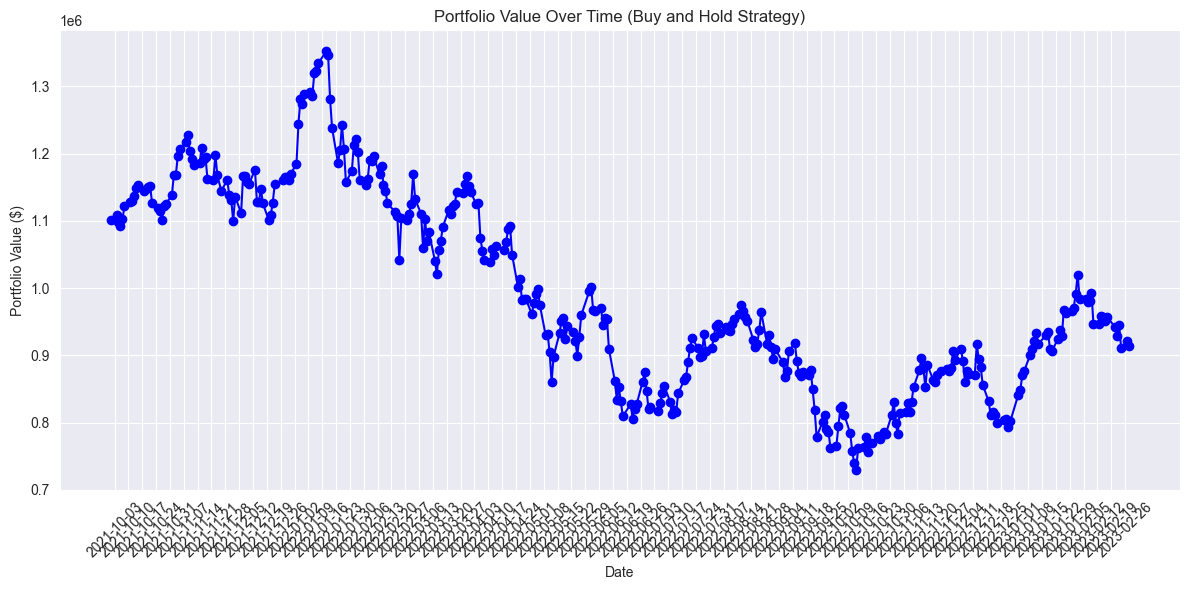

Annual return         -0.123771
Cumulative returns    -0.169401
Annual volatility      0.349061
Sharpe ratio          -0.204961
Calmar ratio          -0.269210
Stability              0.617940
Max drawdown          -0.459755
Omega ratio            0.968214
Sortino ratio         -0.278994
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.968152
Daily value at risk   -0.044261
dtype: float64


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the processed dataframe
portfolio_data = processed.copy()

# Ensure the date column is in datetime format in the copied dataframe
portfolio_data['date'] = pd.to_datetime(portfolio_data['date'])

# Set the initial investment amount
initial_investment = 1_000_000

# Define the start and end dates for the analysis
# start_date = pd.to_datetime('2022-11-14')
# end_date = pd.to_datetime('2024-01-25')

start_date = pd.to_datetime(TEST_START_DATE)
end_date = pd.to_datetime(TEST_END_DATE)

# Filter the dataframe for the starting date to get initial prices
initial_prices = portfolio_data[portfolio_data['date'] == start_date].copy()

# Calculate the number of shares purchased for each stock
initial_prices['shares'] = initial_investment / len(initial_prices) / initial_prices['open']

# Merge the number of shares into the copied dataframe
portfolio_data = portfolio_data.merge(initial_prices[['tic', 'shares']], on='tic', how='inner')

# Calculate the daily portfolio value
portfolio_data['daily_value'] = portfolio_data['close'] * portfolio_data['shares']
df_account_value_buynhold = portfolio_data.groupby('date')['daily_value'].sum().reset_index()
df_account_value_buynhold.rename(columns={'daily_value': 'account_value'}, inplace=True)

# Filter the data between the start_date and end_date
df_account_value_buynhold['date'] = pd.to_datetime(df_account_value_buynhold['date'])
df_account_value_buynhold = df_account_value_buynhold[
    (df_account_value_buynhold['date'] >= start_date) & (df_account_value_buynhold['date'] <= end_date)
]

# Set the date column as the index
df_account_value_buynhold.set_index('date', inplace=True)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_account_value_buynhold.index, df_account_value_buynhold['account_value'], marker='o', color='b')
plt.title('Portfolio Value Over Time (Buy and Hold Strategy)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')

# Set xticks to display weekly intervals
plt.xticks(pd.date_range(start=df_account_value_buynhold.index.min(),
                         end=df_account_value_buynhold.index.max(), freq='W'))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')
df_account_value_buynhold['datadate'] = list(df_account_value_buynhold.index)
df_account_value_buynhold['date'] = list(df_account_value_buynhold.index)
perf_stats_all = backtest_stats(account_value=df_account_value_buynhold)
perf_stats_all = pd.DataFrame(perf_stats_all)

